# World population analysis

## Data loading

In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Avoid scientific notation and impose two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Output directory for figures
output_directory = 'images/'
if (not os.path.isdir(output_directory)):
    os.mkdir(output_directory)

# Load dataset
df = pd.read_csv('world_population.csv')
df

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771.00,38972230.00,33753499.00,28189672.00,19542982.00,10694796.00,12486631.00,10752971.00,652230.00,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321.00,2866849.00,2882481.00,2913399.00,3182021.00,3295066.00,2941651.00,2324731.00,28748.00,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225.00,43451666.00,39543154.00,35856344.00,30774621.00,25518074.00,18739378.00,13795915.00,2381741.00,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.00,46189.00,51368.00,54849.00,58230.00,47818.00,32886.00,27075.00,199.00,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824.00,77700.00,71746.00,71519.00,66097.00,53569.00,35611.00,19860.00,468.00,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572.00,11655.00,12182.00,13142.00,14723.00,13454.00,11315.00,9377.00,142.00,81.49,1.00,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986.00,556048.00,491824.00,413296.00,270375.00,178529.00,116775.00,76371.00,266000.00,2.17,1.02,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614.00,32284046.00,28516545.00,24743946.00,18628700.00,13375121.00,9204938.00,6843607.00,527968.00,63.82,1.02,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675.00,18927715.00,NaN,13792086.00,9891136.00,7686401.00,5720438.00,4281671.00,752612.00,26.60,1.03,0.25


In [48]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              230 non-null    float64
 6   2020 Population              233 non-null    float64
 7   2015 Population              230 non-null    float64
 8   2010 Population              227 non-null    float64
 9   2000 Population              227 non-null    float64
 10  1990 Population              229 non-null    float64
 11  1980 Population              229 non-null    float64
 12  1970 Population              230 non-null    float64
 13  Area (km²)          

In [49]:
# Columns containing NaN values (with their NaN-value count)
df.isnull().sum()[df.isnull().sum() > 0]

2022 Population      4
2020 Population      1
2015 Population      4
2010 Population      7
2000 Population      7
1990 Population      5
1980 Population      5
1970 Population      4
Area (km²)           2
Density (per km²)    4
Growth Rate          2
dtype: int64

In [50]:
# General statistical information
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.00,230.00,233.00,230.00,227.00,227.00,229.00,229.00,230.00,232.00,230.00,232.00,234.00
mean,117.50,34632250.88,33600710.95,32066004.16,30270164.48,26840495.26,19330463.93,16282884.78,15866499.13,581663.75,456.81,1.01,0.43
std,67.69,137889172.44,135873196.61,131507146.34,126074183.54,113352454.57,81309624.96,69345465.54,68355859.75,1769133.06,2083.74,0.01,1.71
min,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
25%,59.25,419738.50,406471.00,394295.00,382726.50,329470.00,261928.00,223752.00,145880.50,2567.25,36.60,1.00,0.01
50%,117.50,5762857.00,5456681.00,5244415.00,4889741.00,4491202.00,3785847.00,3135123.00,2511718.00,77141.00,95.35,1.01,0.07
75%,175.75,22653719.00,21522626.00,19730853.75,16825852.50,15625467.00,11882762.00,9817257.00,8817329.00,414643.25,236.88,1.02,0.28
max,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


## What are the most populated countries?

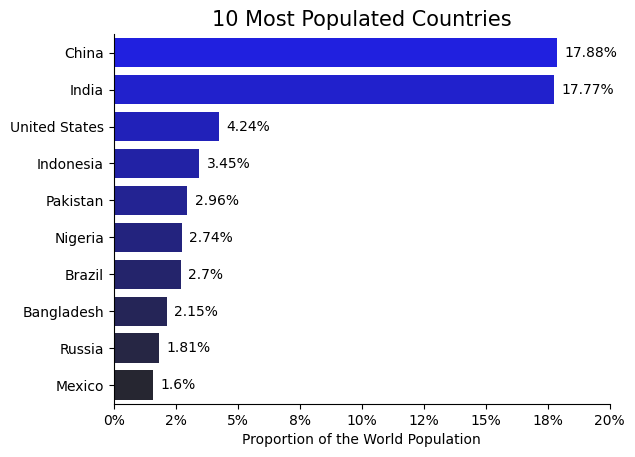

In [51]:
n_countries = 10
column = 'World Population Percentage'

# Select and sort data
df_plot = df.sort_values(column, ascending=False).head(n_countries).copy()

# Plot
sns.barplot(df_plot, x=column, y='Country',
            hue='Country', palette='dark:b_r')
sns.despine()

for idx, val in enumerate(df_plot[column]):   
    plt.text(val+0.3, idx, f'{val}%', va='center')

plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.xlim([0, 20])
plt.xlabel('Proportion of the World Population')
plt.ylabel('')
plt.title(f'{n_countries} Most Populated Countries', fontsize=15)
plt.show()

**Breakdown:**
- China and India are far ahead of other countries, accounting for 17.88% and 17.77% of the world population, respectively.
- The United States comes third, accounting for 4.24% of the world population.

## What are the largest countries?

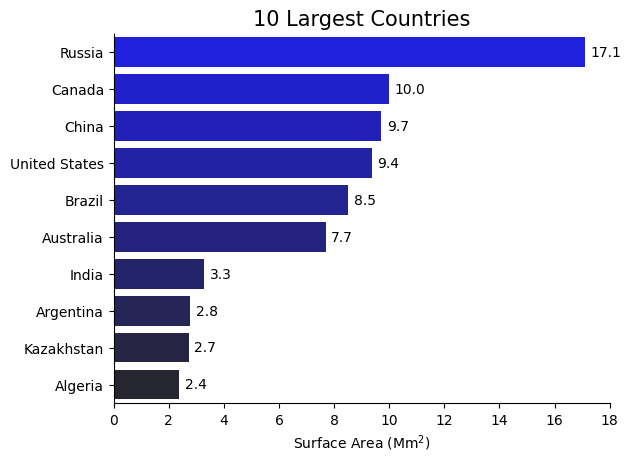

In [52]:
n_countries = 10

# Get area column name
columns = df.columns.to_list()
column = [x for x in columns if x.startswith('Area')][0]

# Select and sort data
df_plot = df.sort_values(column, ascending=False).head(n_countries).copy()

# Plot
sns.barplot(df_plot, x=column, y='Country',
            hue='Country', palette='dark:b_r')
sns.despine()

for idx, val in enumerate(df_plot[column]):   
    plt.text(val+0.2*1e6, idx, f'{val/1e6:.1f}', va='center')

xticks_format = plt.FuncFormatter(lambda y, pos: f'{int(y/1e6)}')
plt.gca().xaxis.set_major_formatter(xticks_format)
plt.xlim([0, 18*1e6])
plt.xlabel('Surface Area (Mm$^2$)')
plt.ylabel('')
plt.title(f'{n_countries} Largest Countries', fontsize=15)
plt.show()

**Breakdown:**
- Russia is the largest country with a surface area of 17.1 Mm<sup>2</sup>.
- It is followed by a cluster of countries consisting of Canada, China, the United States, Brazil and Australia, whose surface areas range from 7.7 Mm<sup>2</sup> to 10 Mm<sup>2</sup>.
- Other countries have surface areas below (or equal to) 3.3 Mm<sup>2</sup>.

## What are the most densely populated countries?

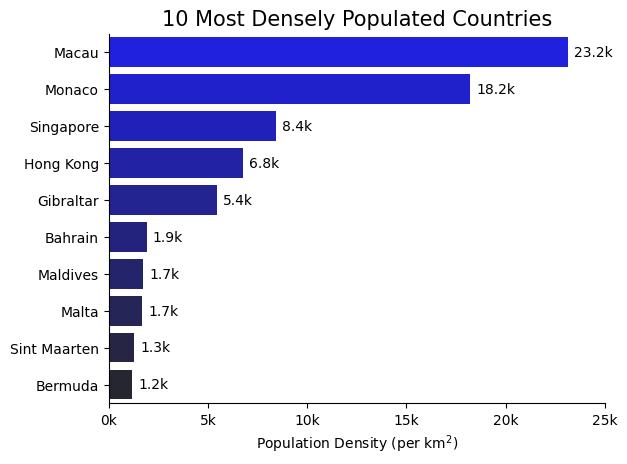

In [53]:
n_countries = 10

# Get density column name
columns = df.columns.to_list()
column = [x for x in columns if x.startswith('Density')][0]

# Select and sort data
df_plot = df.sort_values(column, ascending=False).head(n_countries).copy()

sns.barplot(df_plot, x=column, y='Country',
            hue='Country', palette='dark:b_r')
sns.despine()

for idx, val in enumerate(df_plot[column]):   
    plt.text(val+300, idx, f'{val/1000:.1f}k', va='center')

xticks_format = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(xticks_format)
plt.xlim([0, 25000])
plt.xlabel('Population Density (per km$^2$)')
plt.ylabel('')
plt.title(f'{n_countries} Most Densely Populated Countries', fontsize=15)
plt.show()

**Breakdown:**
- Macau and Monaco are the most densely populated countries, with population densities (per km<sup>2</sup>) of 23.2k and 18.2k, respectively.
- They are followed by a cluster of countries consisting of Singapore, Hong Kong and Gibraltar, whose population densities (per km<sup>2</sup>) range from 5.4k to 8.4k.
- Other countries have population densities (per km<sup>2</sup>) below (or equal to) 1.9k.

## Are there correlations within the dataset? 

Given the discrepancies between top-ranking countries in the above graphs, it makes sense to investigate correlations within the dataset.

Thus, let us compute and visualize correlations within a heat map.

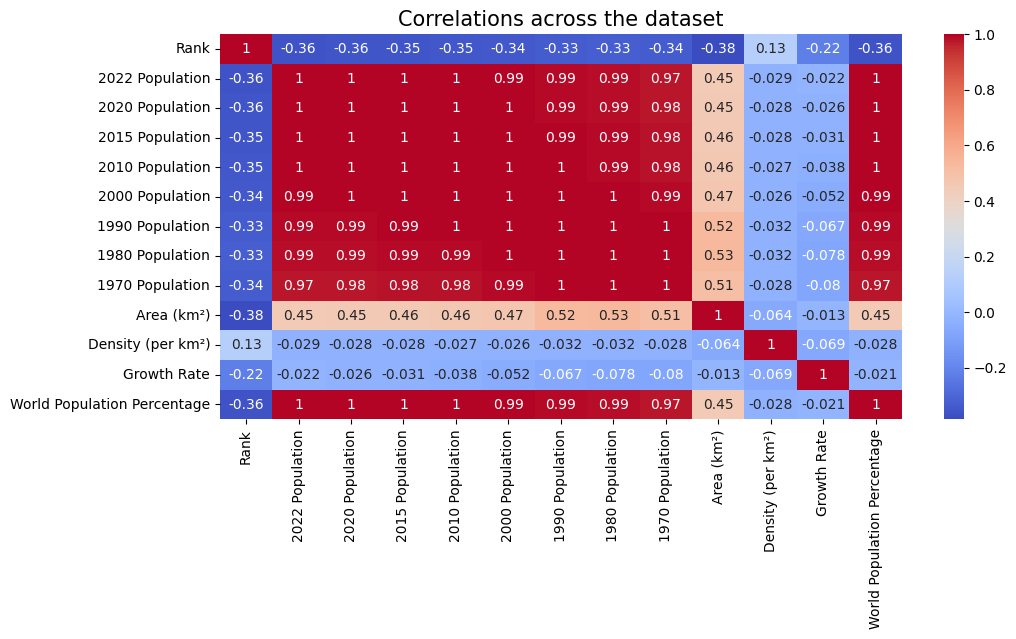

In [54]:
correlations = df.corr(numeric_only=True)

plt.figure(figsize=(11,5))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title('Correlations across the dataset', fontsize=15)
plt.show()

**Breakdown:**
- Yearly population counts and the world population percentage are heavily correlated.
- The country area is mildly correlated with yearly population counts and the world population percentage.
    - This makes sense as a large surface area is a necessary condition for very large populations with reasonable population densities.
- The population density is not correlated with yearly population counts and the world population percentage.
    - This makes sense as large countries can have large populations without the need for large population densities.

## Distribution of population counts

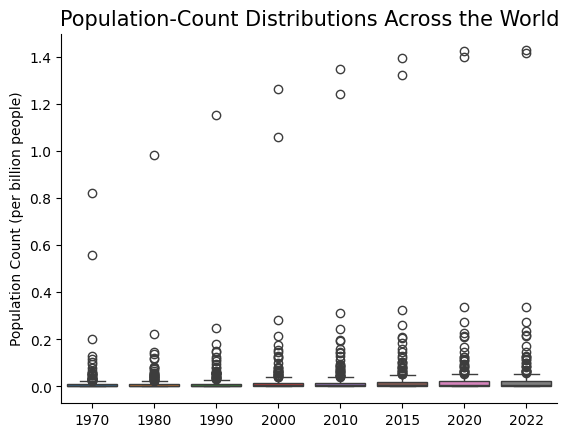

In [55]:
# Get population-count column names and associated years (all sorted)
columns = df.columns.to_list()
columns = [x for x in columns if x.endswith('Population')]
columns.sort()

years = [x[0:4] for x in columns]

# Select data and rename columns
df_plot = df[columns].copy()
df_plot = df_plot.rename(columns=dict(zip(columns, years)))

sns.boxplot(df_plot)
sns.despine()
yticks_format = plt.FuncFormatter(lambda y, pos: f'{y/1e9}')
plt.gca().yaxis.set_major_formatter(yticks_format)
plt.ylabel('Population Count (per billion people)')
plt.title('Population-Count Distributions Across the World', fontsize=15)
plt.show()

**Breakdown:**
- Population counts are heavily skewed toward lower values, presenting a wide range of large-count outliers.
    - In particular, one can track the population counts of India and China as the two largest outliers every year (China's being larger than India's).
    - India lacks two data points, in 1980 and 1990, associated with NaN values in the dataset.
- Given this large skewness, it would be advisable to use medians rather than means as trend descriptors for population counts.

## Have certain continental populations grown faster than others?

### Data preparation

We group data by continents, aggregating them using the median (more robust to data outliers than the mean). Data is then sorted by the 2022 population count (for convenience) and population counts are isolated.

In [56]:
# Aggregate data by continent using the median
df_plot = df.groupby('Continent').median(numeric_only=True)

# Sort data according to the 2022 population (for convenience)
df_plot = df_plot.sort_values('2022 Population', ascending=False)

# Get population-count column names and associated years (all sorted)
columns = df_plot.columns.to_list()
columns = [x for x in columns if x.endswith('Population')]
columns.sort()

years = [x[0:4] for x in columns]

# Isolate population counts and rename columns
df_plot = df_plot[columns]
df_plot = df_plot.rename(columns=dict(zip(columns, years)))

### Absolute population changes

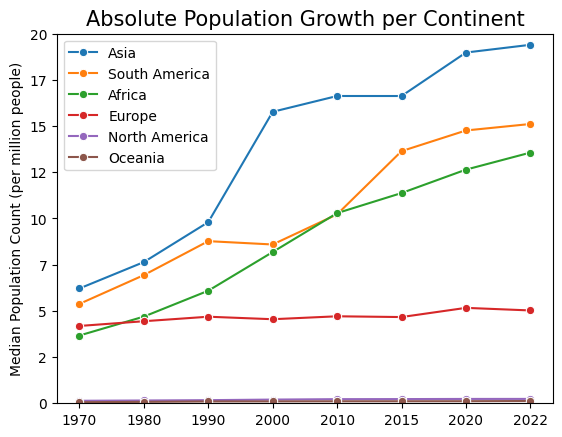

In [57]:
sns.lineplot(df_plot.transpose(),
             dashes=False, markers=['o' for i in range(len(df_plot))])
yticks_format = plt.FuncFormatter(lambda y, pos: f'{int(y/1e6)}')
plt.gca().yaxis.set_major_formatter(yticks_format)
plt.ylim([0, 20000000])
plt.ylabel('Median Population Count (per million people)')
plt.legend(title='')
plt.title('Absolute Population Growth per Continent', fontsize=15)
plt.show()

**Breakdown:**
- The Asian, South American and African populations seems to have shown significant absolute growth compared to the European, North American and Oceanian ones. 
- However, given that the North American and Oceanian populations are not of the same order of magnitude compared to the other populations, it may be insightful to also look at relative population changes.

### Relative population changes

Let us divide the yearly population counts by the 1970 population count to evaluate the relative population changes since 1970.

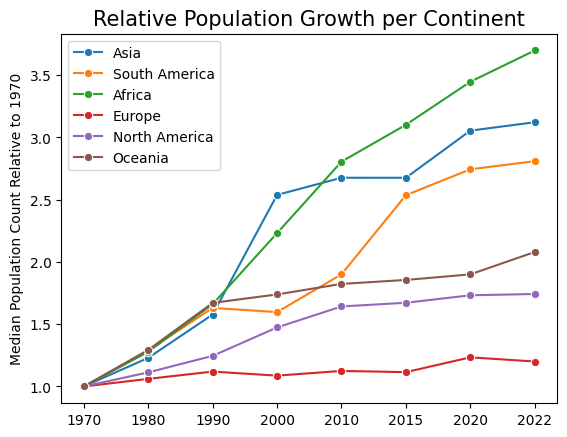

In [58]:
df_plot_2 = df_plot.copy()

reference_year = '1970'
reference = df_plot_2[reference_year]
for x in df_plot_2.columns:
    df_plot_2[x] = df_plot_2[x]/reference

sns.lineplot(df_plot_2.transpose(),
             dashes=False, markers=['o' for i in range(len(df_plot_2))])
# yticks_format = plt.FuncFormatter(lambda y, pos: f'{int(y/1e6)}')
# plt.gca().yaxis.set_major_formatter(yticks_format)
# plt.ylim([0, 20000000])
plt.ylabel(f'Median Population Count Relative to {reference_year}')
plt.legend(title='')
plt.title('Relative Population Growth per Continent', fontsize=15)
plt.show()

**Breakdown:**
- Asia, South America and Africa feature the largest relative population growths.
- While Asia previously showed the largest absolute population count in 2022, Africa now presents the largest relative population growth over the 1970-2022 period.
- North America and Oceania have similar relative population growths.
- Europe shows very little relative population growth compared to other continents.